In [1]:
# Eliriana Lleshi
# Data Science HW1
# Problem 1

import sys
import numpy as np
import pandas as pd

#a

link ='https://github.com/Gapminder-Indicators/gdppc_cppp/raw/master/gdppc_cppp-by-gapminder.xlsx'
income = pd.read_excel(link,'countries_and_territories')

link = 'https://github.com/Gapminder-Indicators/lex/raw/master/lex-by-gapminder.xlsx'
life_exp = pd.read_excel(link, 'countries_and_territories')

countries = pd.read_csv("../Data/countries.csv") 

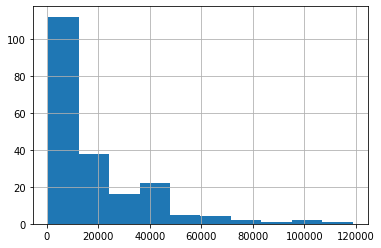

In [4]:
#b

income[2007].hist()

In [5]:
#c

# create dataframe with merges for all years
dataframe = pd.merge( countries, pd.merge(income, life_exp, on = 'geo.name', 
     suffixes = ('_inc','_lexp')) ,left_on='Country', right_on='geo.name', how = 'left')

# isolate dataframe for passed in year
def part1c_func(my_df,year):
    income_year = year + '_inc'
    life_year = year + '_lexp'
    new_df = my_df [['Country', 'Region', income_year, life_year]]
    bp = new_df.boxplot(column = [income_year] ,by = 'Region', rot = 90, figsize = ( 7,7))
    bp.set_title (' ')
    bp.set_yscale ('log')
    bp.get_figure().suptitle ('Income per Capita By Region - Year ' + year)
    bp.set_ylabel ('Income per Capita ')
    return

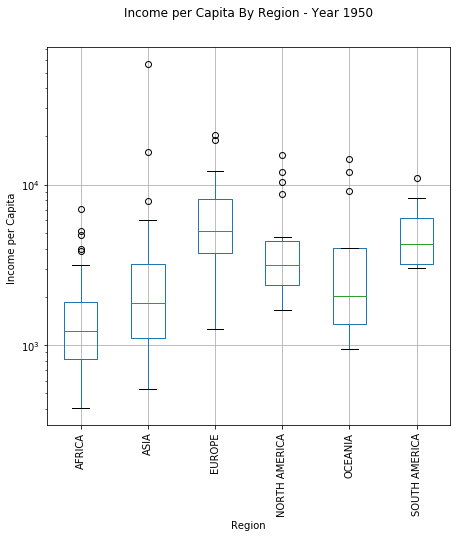

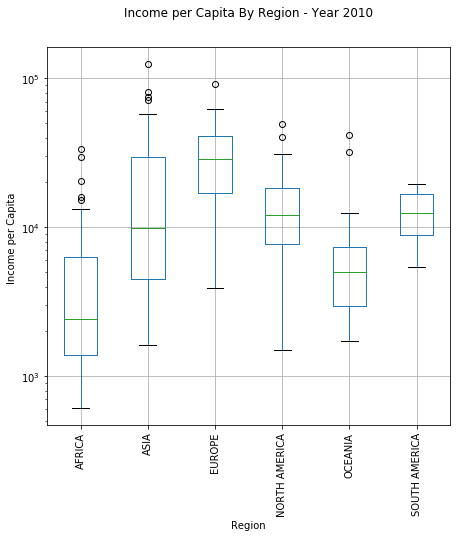

In [39]:
#d 

part1c_func(dataframe,'1950')
part1c_func(dataframe,'2010')

# Conclusion: After 60 years, all regions have income ranges above 10^3. 
# The regions have similar standings in comparison to each other. 
# Asia has a bigger range now, meaning many are poor and many are rich. 

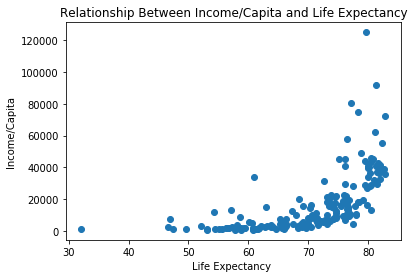

In [6]:
#e

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def part1e_func(my_df, year):
    income_year = year + '_inc'
    life_year = year + '_lexp'
    plt.scatter(my_df[life_year],my_df[income_year]) 
    plt.title ('Relationship Between Income/Capita and Life Expectancy')
    plt.xlabel ('Life Expectancy ')
    plt.ylabel ('Income/Capita ')
    return

# example year is 2010
part1e_func(dataframe, '2010')

# Conclusion: The higher the income per capita, the higher the life expectancy. However, 
# as soon as people have moved away from poverty level (25000+ or so), the income has 
# little bearing on the life expectancy (adds a maximum of 5-10 years). 

In [9]:
# Problem 2

#a 

import urllib.request
from bs4 import BeautifulSoup

soup = BeautifulSoup(urllib.request.urlopen('http://www.indeed.com/jobs?q=data+scientist&l='), 'html.parser')

def part2a_func(my_soup):
    
    search_result = my_soup.find(id="searchCountPages")
    search_result_items = search_result.get_text().split() # ['Page', '1', 'of', '11,933', 'jobs']
    return search_result_items[3]

part2a_func(soup)

'11,941'

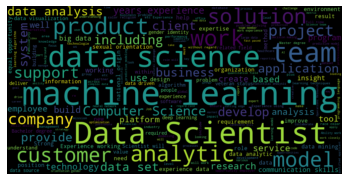

In [19]:
#b

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
posting_text = ''
location = []
for start in range(0, 1000, 10):
    indeed_link = "https://www.indeed.com/jobs?q=data%20scientist&start=" + str(start)
    resp_indeed = urllib.request.urlopen(indeed_link)
    soup_link = BeautifulSoup(resp_indeed, 'html.parser')
    soup_links =  soup_link.find_all('a', attrs={  'data-tn-element':"jobTitle", 'href': True})
    location = location + soup_link.find_all(attrs={ 'class' :"location accessible-contrast-color-location"})
    for link in soup_links:
        job_link = "https://www.indeed.com" + link.get("href")
        try:
            job_resp = urllib.request.urlopen(job_link)
            soup_job = BeautifulSoup(job_resp, 'html.parser') 
            soup_job_html = soup_job.find_all('div', attrs={  'id': "jobDescriptionText"})
        except: 
            pass
        for div in soup_job_html:
            posting_text =  posting_text + div.get_text('\n')
            
# Create and generate a word cloud image:
wordcloud = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(posting_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

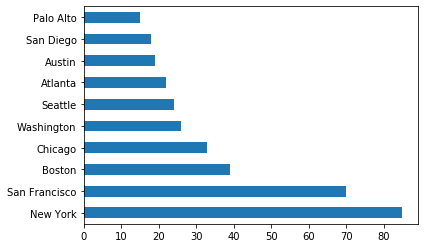

In [22]:
#c

import pandas as pd
from collections import Counter 

cities = []
# isolate cities, filter
for loc in location:
    cities.append(loc.text.split(',')[0])
for city in cities:
    if (city == "Remote") or (city == "United States"):
        cities.remove(city)  
        
# find and display top 10 most frequent 
df = pd.DataFrame(cities , columns =['Cities']) 
df_sorted = df['Cities'].sort_values().value_counts()
df_sorted[:10].plot.barh()